<h1><strong><u>California Housing Market Model</u></strong></h1>

In [62]:
from sklearn.datasets import fetch_california_housing
from mglearn.datasets import load_extended_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2><strong><u>Data Preprocessing</u></strong></h2>

<h3><u>Data Loading</u></h3>

In [42]:
data = fetch_california_housing(as_frame=True)

In [53]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [43]:
X = data.data
y = data.target

In [44]:
features = X.columns
print(X.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None


<h3><u>Feature Scaling</u></h3>

In [45]:
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=features)
X_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


<h3><u>Data Preparation</u></h3>

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=23)

In [47]:
display(X_train.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
10096,-0.026988,0.425936,-0.159601,-0.016750,-0.642401,-0.066283,-0.796789,0.813436
7835,-0.290809,0.505394,-0.616074,-0.648997,-0.720109,0.103892,-0.806152,0.708618
13526,0.261572,-0.050812,0.389577,-0.178878,-0.107270,0.003284,-0.679742,1.132879
10224,-0.411296,-0.289187,-0.644079,0.067229,-0.592067,-0.108781,-0.824880,0.838392
17037,0.185985,1.141059,0.091385,-0.130762,-0.177032,-0.039803,0.869956,-1.337818


<h2><strong><u>Linear Regression Model</u></strong></h2>

<h3><u>All Features Included</u></h3>

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
print(lr.coef_)

[ 0.82775746  0.11338216 -0.26670793  0.28624545 -0.00376283 -0.08177272
 -0.89813668 -0.86630696]


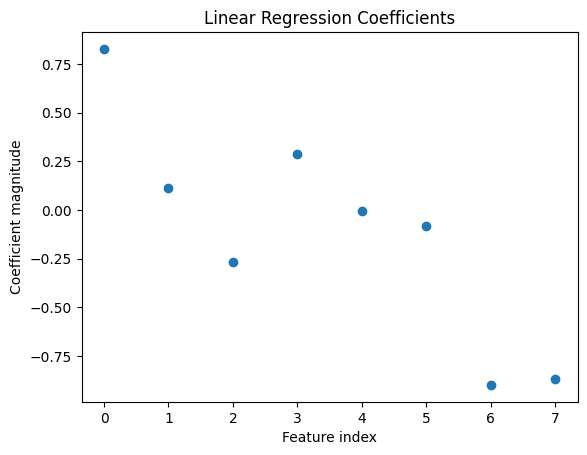

In [51]:
plt.scatter(range(len(lr.coef_)), lr.coef_)
plt.xlabel("Feature index")
plt.ylabel("Coefficient magnitude")
plt.title("Linear Regression Coefficients")
plt.show()

In [ ]:
training_predictions = lr.predict(X_train)
mse = mean_squared_error(y_train, training_predictions)
mae = mean_absolute_error(y_train, training_predictions)
print(f"Training MAE: {mae:.3f}")
r2 = lr.score(X_train, y_train)
print(f"Training R^2: {r2:.3f}")
rsme = np.sqrt(mse)
avg_target = np.mean(y_train)
std_target = np.std(y_train)
print(f"Target standard deviation: {std_target:.3f}")
print(f"Training RSME: {rsme:.3f}")
print(f"Average target value: {avg_target:.3f}")
target_range = y_train.max() - y_train.min()
print(f"Target range: {target_range:.3f}")
train_percentage = (rsme / avg_target) * 100
print(f"RSME as percentage of average target: {train_percentage:.2f}%")
print("RMSE over target range: {:.2f}".format((rsme / target_range)))
print("RMSE over target std dev: {:.2f}".format((rsme / std_target)))

Training MAE: 0.530
Training MSE: 0.529
Training R^2: 0.601
Target standard deviation: 1.151
Training RSME: 0.727
Average target value: 2.067
Target range: 4.850
RSME as percentage of average target: 35.18%
RMSE over target range: 0.15
RMSE over target std dev: 0.63


<h3><u>Linear Regression Model with Reduced Features</u></h3>

In [ ]:
X_scaled_reduced = X_scaled[['MedInc','Latitude', 'Longitude']]
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_scaled_reduced, y, random_state=23)

In [66]:
lr_reduced = LinearRegression()
lr_reduced.fit(X_train_reduced, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [67]:
reduced_training_predictions = lr_reduced.predict(X_train_reduced)
rmse_reduced = np.sqrt(mean_squared_error(y_train, reduced_training_predictions))
mae_reduced = mean_absolute_error(y_train, reduced_training_predictions)
r2_reduced = lr_reduced.score(X_train_reduced, y_train)
reduced_train_percentage = (rmse_reduced / avg_target) * 100
print(f"\nReduced Model Training MAE: {mae_reduced:.3f}")
print(f"Reduced Model Training R^2: {r2_reduced:.3f}")
print(f"Reduced Model Training RSME: {rmse_reduced:.3f}")
print(f"Reduced Model RSME as percentage of average target: {reduced_train_percentage:.2f}%")
print(f"Reduced Model RMSE over target range: {(rmse_reduced / target_range):.2f}")
print(f"Reduced Model RMSE over target std dev: {(rmse_reduced / std_target):.2f}")


Reduced Model Training MAE: 0.547
Reduced Model Training R^2: 0.581
Reduced Model Training RSME: 0.745
Reduced Model RSME as percentage of average target: 36.05%
Reduced Model RMSE over target range: 0.15
Reduced Model RMSE over target std dev: 0.65
